### P.S-Person Diabetic or not

##### Sometimes missing values can be zero

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Reading the data
DF = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/pima-indians-diabetes-2.csv")
DF

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Checking for missing values
DF.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [4]:
DF['Plas']=DF['Plas'].replace(to_replace= 0,value=np.nan)

In [5]:
median1=DF['Plas'].median()
median1

117.0

In [6]:
DF['Plas'].replace(np.nan,median1,inplace=True)

In [7]:
DF['Pres']=DF['Pres'].replace(to_replace= 0,value=np.nan)

In [8]:
median2=DF['Pres'].median()
median2

72.0

In [9]:
DF['Pres'].replace(np.nan,median2,inplace=True)

In [10]:
DF['skin']=DF['skin'].replace(to_replace= 0,value=np.nan)

In [11]:
median3=DF['skin'].median()
median3

29.0

In [12]:
DF['skin'].replace(np.nan,median3,inplace=True)

In [13]:
DF['test']=DF['test'].replace(to_replace= 0,value=np.nan)

In [14]:
median4=DF['test'].median()
median4

125.0

In [15]:
DF['test'].replace(np.nan,median4,inplace=True)

In [16]:
DF['mass']=DF['mass'].replace(to_replace= 0,value=np.nan)

In [17]:
median5=DF['mass'].median()
median5

32.3

In [18]:
DF['mass'].replace(np.nan,median5,inplace=True)

In [19]:
DF['pedi']=DF['pedi'].replace(to_replace= 0,value=np.nan)

In [20]:
median6=DF['pedi'].median()
median6

0.3725

In [21]:
DF['pedi'].replace(np.nan,median6,inplace=True)

In [22]:
DF['age']=DF['age'].replace(to_replace= 0,value=np.nan)

In [23]:
median7=DF['age'].median()
median7

29.0

In [24]:
DF['age'].replace(np.nan,median7,inplace=True)

In [25]:
DF.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [26]:
X=DF.drop(['class'],axis=1)
y=DF[['class']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [28]:
reg_model = LogisticRegression()
reg_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
reg_model.score(X_train,y_train)

0.7690875232774674

In [30]:
reg_model.score(X_test,y_test)

0.7748917748917749

In [31]:
predictions = reg_model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7748917748917749

In [33]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       146
           1       0.76      0.56      0.65        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



<AxesSubplot:>

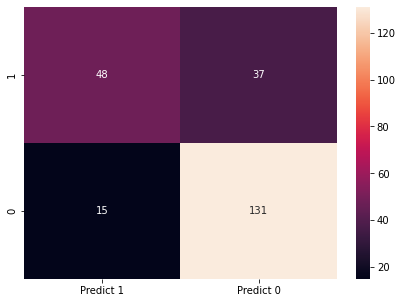

In [34]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
DF_cm=pd.DataFrame(cm,index=[i for i in ['1','0']],
                  columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(DF_cm,annot=True,fmt='g')

In [35]:
from sklearn.svm import SVC
clf=SVC(kernel='linear',C=2,gamma='auto')
clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)
print(accuracy_score(y_test,y_predict))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7705627705627706


In [36]:
clf.score(X_train,y_train)

0.7635009310986964

In [37]:
clf.score(X_test,y_test)

0.7705627705627706

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
Knn=KNeighborsClassifier(n_neighbors=4,p=1) #p=1:Manhattan and p=2: Euclidian

In [40]:
Knn.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4, p=1)

In [41]:
Knn.score(X_train,y_train)

0.8175046554934823

In [42]:
Knn.score(X_test,y_test)

0.7662337662337663

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
DT=DecisionTreeClassifier(max_depth=5,criterion='entropy')

In [45]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [46]:
DT.score(X_train,y_train)

0.8324022346368715

In [47]:
DT.score(X_test,y_test)

0.8181818181818182

### Bagging Classifier

In [48]:
from sklearn.ensemble import BaggingClassifier

In [49]:
BM=BaggingClassifier(n_estimators=12,max_samples=11)

In [50]:
BM.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(max_samples=11, n_estimators=12)

In [51]:
BM.score(X_train,y_train)

0.7262569832402235

In [52]:
BM.score(X_test,y_test)

0.7359307359307359

### Boosting Classifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
Boost=AdaBoostClassifier(n_estimators=20,random_state=0)

In [55]:
Boost.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=20, random_state=0)

In [56]:
Boost.score(X_train,y_train)

0.7821229050279329

In [57]:
Boost.score(X_test,y_test)

0.8008658008658008

### Gradient Boost

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
GB=GradientBoostingClassifier(n_estimators=9,random_state=0)

In [60]:
GB.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(n_estimators=9, random_state=0)

In [61]:
GB.score(X_train,y_train)

0.7746741154562383

In [62]:
GB.score(X_test,y_test)

0.7489177489177489

### Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rcl = RandomForestClassifier(criterion='gini',max_samples=11)

In [72]:
rcl.fit(X_train,y_train)

C:\Users\mdsha\AppData\Local\Temp\ipykernel_15280\1548189888.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rcl.fit(X_train,y_train)


RandomForestClassifier(max_samples=11)

In [73]:
rcl.score(X_train,y_train)

0.7486033519553073

In [74]:
rcl.score(X_test,y_test)

0.7662337662337663